In [2]:
# Importing the libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
from PIL import Image
from collections import Counter


# Define the path to your pickle files directory
path_to_pickles = 'C:\git_projeto_todo\BigData\pkl_files\\'

# List of pickle filenames
pickle_files = ['ad-be.pkl', 'ad-cdu.pkl', 'ad-chega.pkl', 'ad-il.pkl','ad-livre.pkl', 'ad-pan.pkl', 'ad-ps.pkl', 'be-ps.pkl', 'cdu-be.pkl', 'cdu-ps.pkl', 'chega-be.pkl', 'chega-cdu.pkl', 'chega-il.pkl', 'chega-ps.pkl', 'il-be.pkl', 'il-cdu.pkl', 'il-ps.pkl', 'livre-be.pkl', 'livre-cdu.pkl', 'livre-chega.pkl', 'livre-il.pkl', 'livre-ps.pkl', 'pan-be.pkl', 'pan-cdu.pkl', 'pan-chega.pkl', 'pan-il.pkl', 'pan-livre.pkl', 'pan-ps.pkl']

# Dictionary to store emotion counts for each debate
debate_emotions = {}

for file in pickle_files:
    # Load each pickle file
    data = pd.read_pickle(path_to_pickles + file)

    # Initialize a list to store all emotions from the debate
    emotions = []

    # Loop through the DataFrame and extract the emotions
    for i in range(data.shape[0]):
        emotions.extend([fer['emotion'] for fer in data.iloc[i, 6]])  # Adjust the index if necessary

    # Count the number of each emotion
    emotion_count = Counter(emotions)

    # Store the emotion counts in the dictionary with the filename as the key
    debate_emotions[file.replace('.pkl', '')] = emotion_count

Emotions for be: Counter({'Surprise': 1078, 'Anger': 546, 'Neutral': 518, 'Contempt': 487, 'Disgust': 193, 'Sadness': 185, 'Fear': 30, 'Happiness': 16})
Emotions for cdu: Counter({'Sadness': 1577, 'Neutral': 1289, 'Surprise': 664, 'Anger': 548, 'Contempt': 419, 'Fear': 266, 'Disgust': 252, 'Happiness': 29})
Emotions for chega: Counter({'Anger': 1332, 'Surprise': 1322, 'Sadness': 958, 'Neutral': 868, 'Contempt': 710, 'Disgust': 468, 'Fear': 407, 'Happiness': 122})
Emotions for il: Counter({'Neutral': 2396, 'Sadness': 1936, 'Disgust': 715, 'Surprise': 567, 'Anger': 507, 'Contempt': 399, 'Fear': 209, 'Happiness': 52})
Emotions for livre: Counter({'Surprise': 1155, 'Neutral': 1096, 'Anger': 888, 'Sadness': 422, 'Disgust': 291, 'Fear': 289, 'Contempt': 76, 'Happiness': 25})
Emotions for pan: Counter({'Surprise': 790, 'Disgust': 726, 'Neutral': 655, 'Anger': 489, 'Contempt': 259, 'Sadness': 202, 'Fear': 72, 'Happiness': 28})
Emotions for ps: Counter({'Neutral': 3845, 'Anger': 2235, 'Surprise

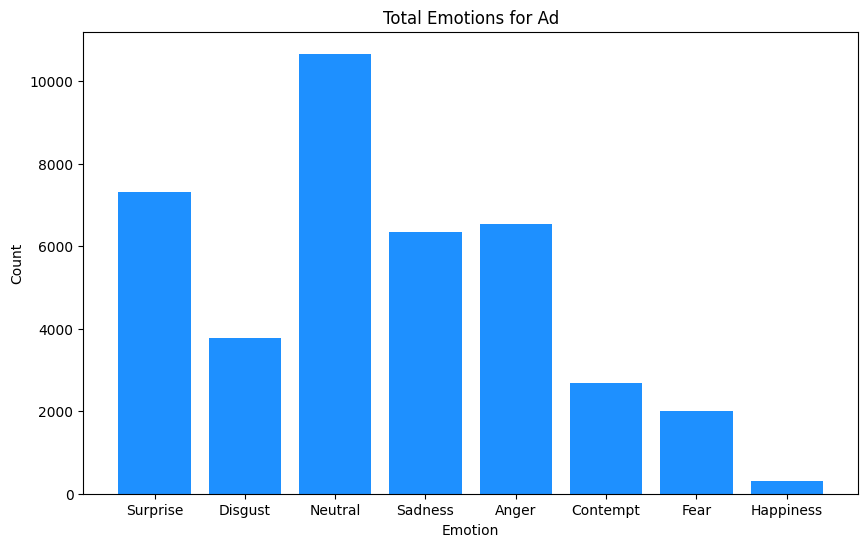

Total emotions for be: Counter({'Surprise': 9143, 'Neutral': 7048, 'Sadness': 6684, 'Contempt': 2048, 'Disgust': 2035, 'Fear': 1649, 'Anger': 1024, 'Happiness': 213})


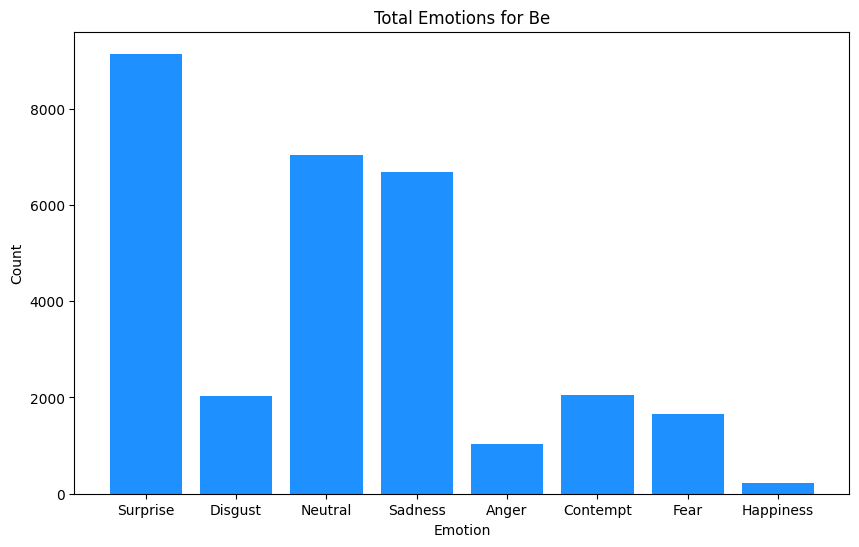

Total emotions for cdu: Counter({'Neutral': 10103, 'Sadness': 7126, 'Surprise': 6717, 'Disgust': 2354, 'Anger': 2352, 'Fear': 1675, 'Contempt': 1001, 'Happiness': 175})


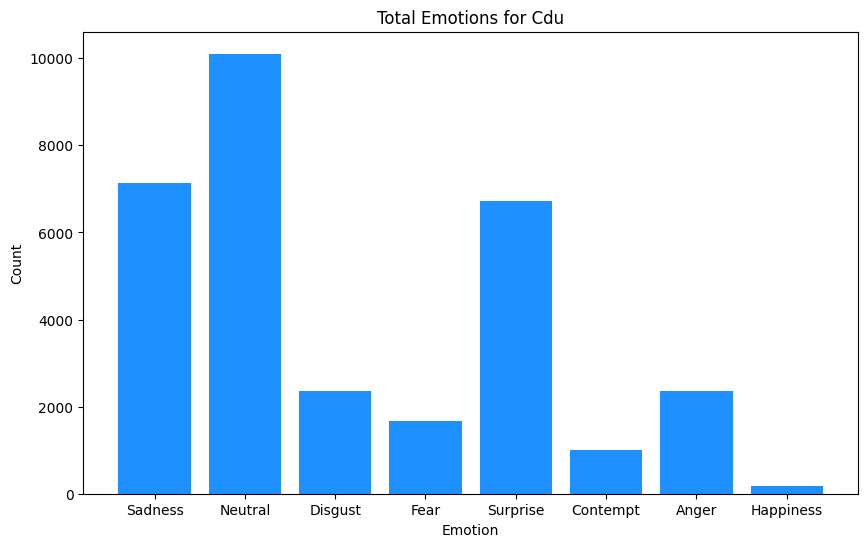

Total emotions for chega: Counter({'Surprise': 9042, 'Neutral': 8185, 'Sadness': 7667, 'Anger': 2586, 'Disgust': 2491, 'Contempt': 2033, 'Fear': 1888, 'Happiness': 532})


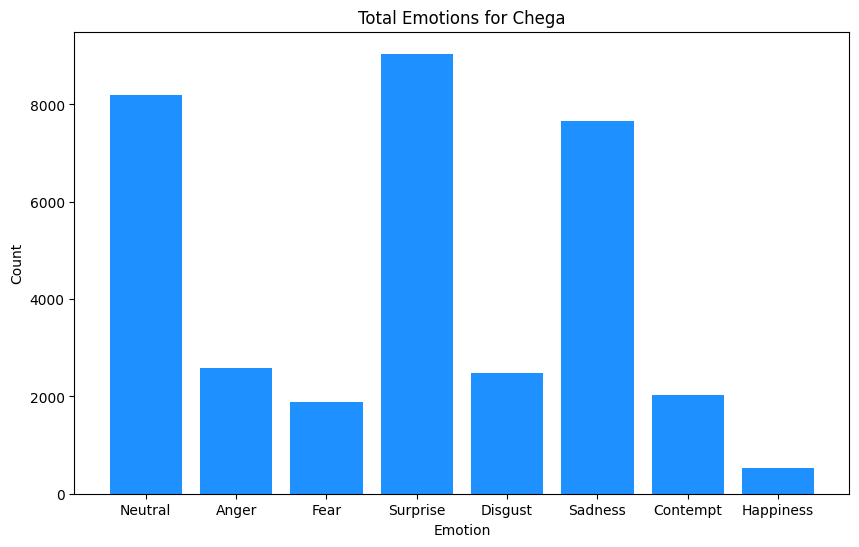

Total emotions for il: Counter({'Neutral': 10395, 'Surprise': 6063, 'Sadness': 5445, 'Contempt': 2514, 'Disgust': 2412, 'Anger': 1589, 'Fear': 1147, 'Happiness': 257})


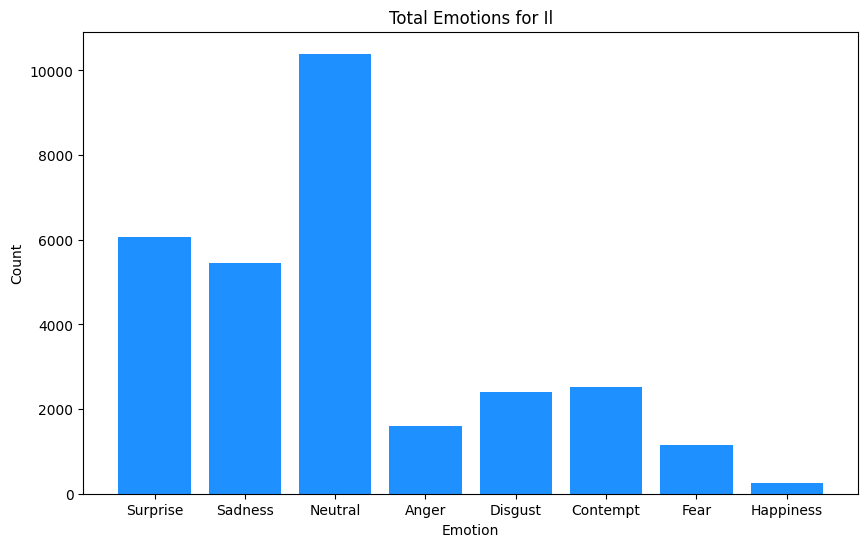

Total emotions for livre: Counter({'Surprise': 9140, 'Neutral': 7765, 'Sadness': 6049, 'Anger': 2262, 'Disgust': 1905, 'Fear': 1445, 'Contempt': 1341, 'Happiness': 346})


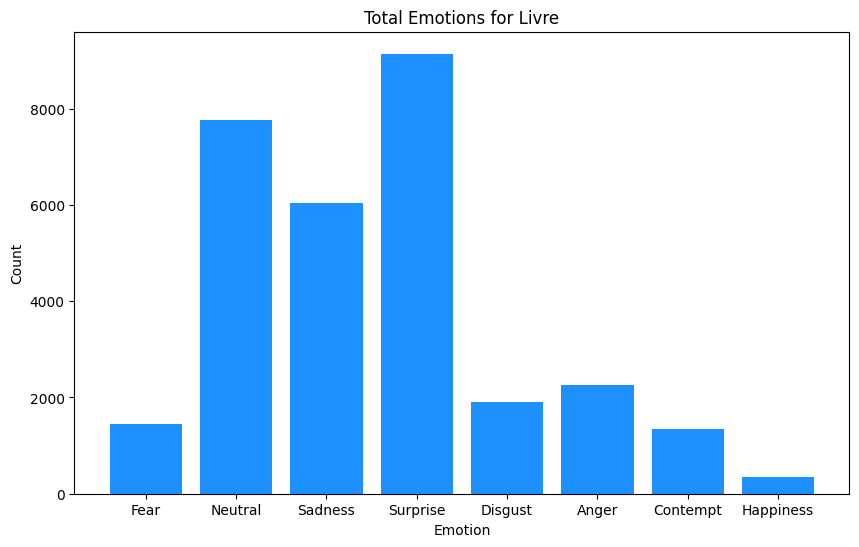

Total emotions for pan: Counter({'Surprise': 7851, 'Neutral': 7048, 'Disgust': 3510, 'Sadness': 3441, 'Anger': 2021, 'Fear': 1161, 'Contempt': 1002, 'Happiness': 348})


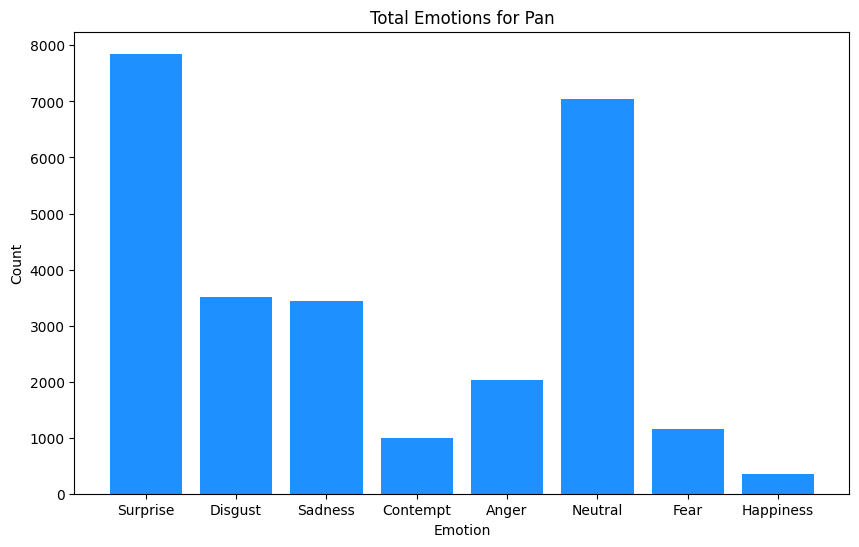

Total emotions for ps: Counter({'Neutral': 14571, 'Sadness': 7611, 'Surprise': 7583, 'Anger': 3625, 'Disgust': 2739, 'Fear': 2490, 'Contempt': 1322, 'Happiness': 230})


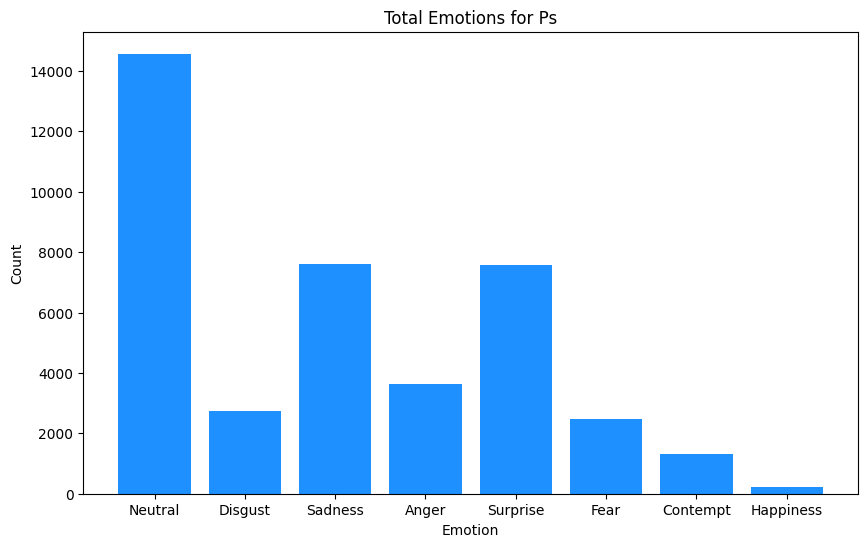

In [3]:
from collections import defaultdict

# Initialize a dictionary to store the aggregate emotions for each party
party_emotions = defaultdict(Counter)

# Iterate through each debate and its associated emotion counts
for debate, emotions in debate_emotions.items():
    # Split the debate key to get the parties involved
    parties = debate.split('-')
    
    # Aggregate emotions for each party involved in the debate
    for party in parties:
        party_emotions[party] += emotions
    
    print(f"Emotions for {party}: {emotions}")


# Now, you can print or further process the aggregated emotion counts for each party
for party, emotions in party_emotions.items():
    print(f"Total emotions for {party}: {emotions}")
    plt.figure(figsize=(10, 6))
    plt.bar(emotions.keys(), emotions.values(), color='dodgerblue')
    plt.title(f"Total Emotions for {party.capitalize()}")
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.show()



In [8]:
data_table_C = []
print(party_emotions)

print(party_emotions.items())

# Convert to DataFrame
data_items = []
for party, emotions in party_emotions.items():
    for emotion, count in emotions.items():
        data_items.append({'Party': party, 'Emotion': emotion, 'Count': count})

df = pd.DataFrame(data_items)

# Create a pivot table
contingency_table = pd.pivot_table(df, values='Count', index='Emotion', columns='Party', aggfunc=sum, fill_value=0)

# Display the contingency table
print(contingency_table)

# Transposing for a better view (optional)
print(contingency_table.T)



defaultdict(<class 'collections.Counter'>, {'ad': Counter({'Neutral': 10667, 'Surprise': 7323, 'Anger': 6545, 'Sadness': 6333, 'Disgust': 3782, 'Contempt': 2685, 'Fear': 2013, 'Happiness': 303}), 'be': Counter({'Surprise': 9143, 'Neutral': 7048, 'Sadness': 6684, 'Contempt': 2048, 'Disgust': 2035, 'Fear': 1649, 'Anger': 1024, 'Happiness': 213}), 'cdu': Counter({'Neutral': 10103, 'Sadness': 7126, 'Surprise': 6717, 'Disgust': 2354, 'Anger': 2352, 'Fear': 1675, 'Contempt': 1001, 'Happiness': 175}), 'chega': Counter({'Surprise': 9042, 'Neutral': 8185, 'Sadness': 7667, 'Anger': 2586, 'Disgust': 2491, 'Contempt': 2033, 'Fear': 1888, 'Happiness': 532}), 'il': Counter({'Neutral': 10395, 'Surprise': 6063, 'Sadness': 5445, 'Contempt': 2514, 'Disgust': 2412, 'Anger': 1589, 'Fear': 1147, 'Happiness': 257}), 'livre': Counter({'Surprise': 9140, 'Neutral': 7765, 'Sadness': 6049, 'Anger': 2262, 'Disgust': 1905, 'Fear': 1445, 'Contempt': 1341, 'Happiness': 346}), 'pan': Counter({'Surprise': 7851, 'Neutr

C:\Users\berna\AppData\Local\Temp\ipykernel_12344\3788887656.py:15: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  contingency_table = pd.pivot_table(df, values='Count', index='Emotion', columns='Party', aggfunc=sum, fill_value=0)


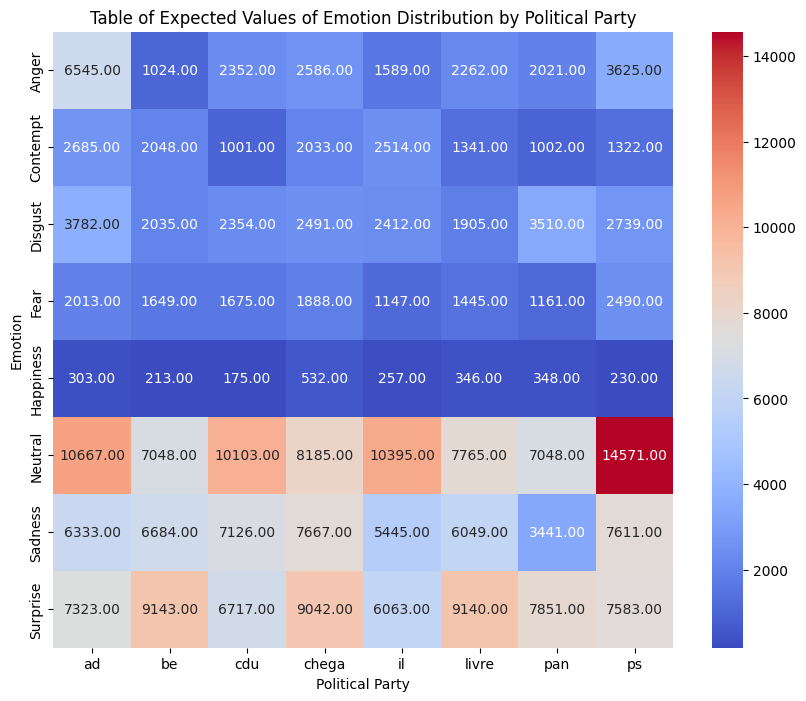

In [37]:
import seaborn as sns

#make a heat map of the expected values
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Table of Expected Values of Emotion Distribution by Political Party')
plt.ylabel('Emotion')
plt.xlabel('Political Party')
plt.show()

              ad    be    cdu  chega     il  livre   pan     ps
Surprise    7323  9143   6717   9042   6063   9140  7851   7583
Disgust     3782  2035   2354   2491   2412   1905  3510   2739
Neutral    10667  7048  10103   8185  10395   7765  7048  14571
Sadness     6333  6684   7126   7667   5445   6049  3441   7611
Anger       6545  1024   2352   2586   1589   2262  2021   3625
Contempt    2685  2048   1001   2033   2514   1341  1002   1322
Fear        2013  1649   1675   1888   1147   1445  1161   2490
Happiness    303   213    175    532    257    346   348    230
Row Marginal Totals:
Surprise     62862
Disgust      21228
Neutral      75782
Sadness      50356
Anger        22004
Contempt     13946
Fear         13468
Happiness     2404
dtype: int64

Column Marginal Totals:
ad       39651
be       29844
cdu      31503
chega    34424
il       29822
livre    30253
pan      26382
ps       40171
dtype: int64

Grand Total:
262050

Expected Values:
                     ad           be     

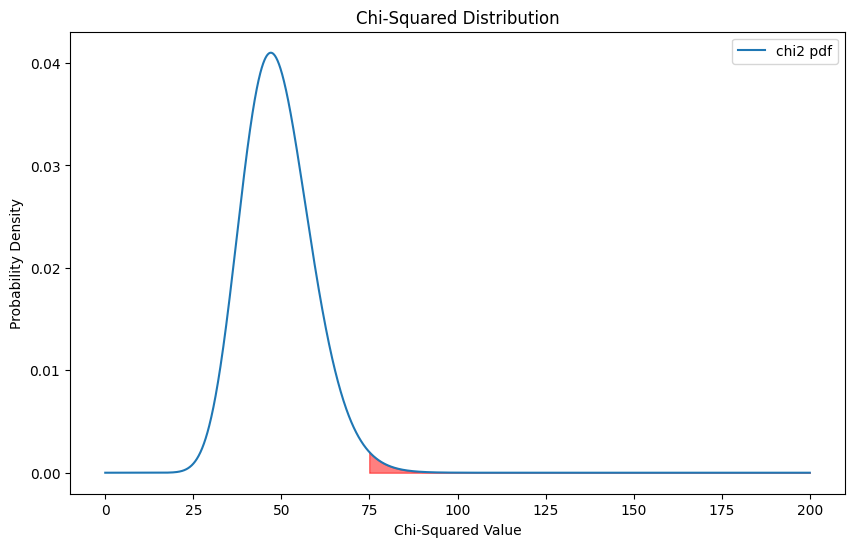

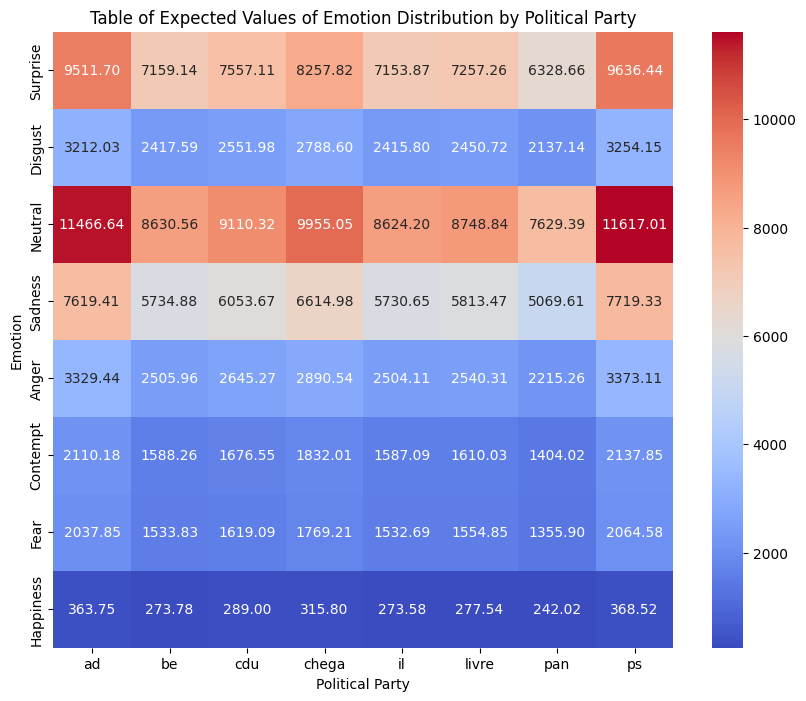

In [35]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

# Convert the dictionary to a DataFrame
emotion_df = pd.DataFrame(party_emotions).fillna(0).astype(int)
print(emotion_df)


# Calculate row and column marginal totals
row_totals = emotion_df.sum(axis=1)
column_totals = emotion_df.sum(axis=0)

print("Row Marginal Totals:")
print(row_totals)
print("\nColumn Marginal Totals:")
print(column_totals)

# Calculate the grand total

grand_total = row_totals.sum()
print("\nGrand Total:")
print(grand_total)

# Create the expected values DataFrame  --> syntethic data
expected = pd.DataFrame(np.outer(row_totals.values, column_totals.values) / grand_total, columns=emotion_df.columns, index=emotion_df.index)
print("\nExpected Values:")
print(expected)

# Calculate the chi-squared statistic
chi_squared = (((emotion_df - expected) ** 2) / expected).sum().sum()
print("\nChi-Squared Statistic:")
print(chi_squared)

# Calculate the degrees of freedom
degrees_of_freedom = (emotion_df.shape[0] - 1) * (emotion_df.shape[1] - 1)
print("\nDegrees of Freedom:")
print(degrees_of_freedom)

# Set the significance level
alpha = 0.01

# Calculate the critical value from the chi-squared distribution table
critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print("\nCritical Value:")  
print(critical_value)

# Calculate the p-value

#plot the chi-squared distribution
x = np.linspace(0, 200, 2000)
y = stats.chi2.pdf(x, degrees_of_freedom)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='chi2 pdf')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5)
plt.title('Chi-Squared Distribution')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Flatten the expected and emotion_df DataFrames
expected_flattened = expected.values.flatten()
emotion_df_flattened = emotion_df.values.flatten()

#make a heat map of the expected values
plt.figure(figsize=(10, 8))
sns.heatmap(expected, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Table of Expected Values of Emotion Distribution by Political Party')
plt.ylabel('Emotion')
plt.xlabel('Political Party')
plt.show()




Completely dependent. The variables are dependent, it means that the occurrence of a particular facial expression during the TV elections debate is influenced by which political party is being debated, and vice versa. This suggests that there is some relationship or association between the political parties and the expressed emotions.


Residuals:
                  ad         be        cdu      chega         il      livre  \
Surprise  -22.441779  23.446593  -9.664068   8.629459 -12.897365  22.100643   
Disgust    10.056931  -7.781050  -3.919018  -5.635598  -0.077393 -11.023556   
Neutral    -7.467488 -17.034935  10.400177 -17.740372  19.068254 -10.518363   
Sadness   -14.737302  12.533159  13.782172  12.934829  -3.773385   3.089062   
Anger      55.727604 -29.603963  -5.702002  -5.664391 -18.287253  -5.521773   
Contempt   12.513291  11.535803 -16.498749   4.695915  23.266723  -6.704766   
Fear       -0.550569   2.940817   1.389498   2.824077  -9.851810  -2.785741   
Happiness  -3.185317  -3.673519  -6.706020  12.166078  -1.002503   4.109654   

                 pan         ps  
Surprise   19.136207 -20.918181  
Disgust    29.696856  -9.030564  
Neutral    -6.656104  27.406971  
Sadness   -22.873384  -1.233008  
Anger      -4.127397   4.337116  
Contempt  -10.729038 -17.645080  
Fear       -5.292874   9.362735  
Happ

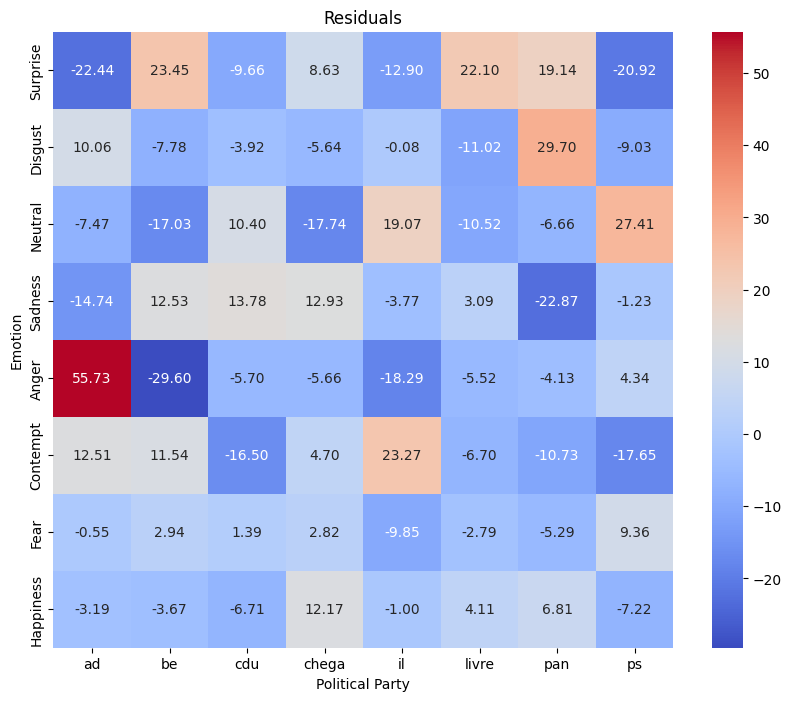

In [36]:
#Now lets calculate the residuals
residuals = (emotion_df - expected) / np.sqrt(expected)
print("\nResiduals:")
print(residuals)

#make a heat map of the residuals
plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Residuals')
plt.ylabel('Emotion')
plt.xlabel('Political Party')
plt.show()

